## Extract text data from pdf

In [20]:
# importing libraries to extract text data from pdf
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
from io import StringIO
from pdfminer.pdfpage import PDFPage

In [21]:
def path(path_to_pdf):
    resource_manager = PDFResourceManager()
    out_text = StringIO()
    laParams = LAParams()
    text_converter = TextConverter(resource_manager, out_text, laparams=laParams)
    fp = open(path_to_pdf,'rb')
    interpreter = PDFPageInterpreter(resource_manager, text_converter)
    for page in PDFPage.get_pages(fp,pagenos=set(), maxpages=0, password="", caching=True, check_extractable=True):
        interpreter.process_page(page)
    text = out_text.getvalue()
    fp.close()
    text_converter.close()
    out_text.close()
    return text

In [22]:
path_to_pdf = (r"D:\Live Project\Data\27-30.pdf")

In [23]:
# extracting the text
output_text = path(path_to_pdf)
print(output_text)

Haematologia, Vol. 30, No. 1, pp. 27–30 (2000)
(cid:211) VSP 2000.

Serum L-selectin and P-selectin levels in lymphomas

Short communication

I. C. HAZNEDARO ˇGLU, M. BENEKLI
I. H. GÜLLÜ, S. V. DÜNDAR and ¸S. KIRAZLI
Department of Internal Medicine, Hematology and Oncology Division, Hacettepe University
Medical School, Ankara, Turkey

, O. OZCEBE, M. C. SAVA ¸S,

(cid:3)

Abstract—The migration of normal and malignant lymphoid cells is governed by speciﬁc adhesion
molecules. Selectins comprise a family of adhesion receptors expressed by leukocytes, platelets and
endothelial cells. In this study, the serum levels of soluble L-selectin and P-selectin were measured in
patients with non-Hodgkin’s lymphoma and Hodgkin’s disease and found to be signiﬁcantly elevated
in both patient groups compared to healthy controls. This result provides evidence that alterations in
the expression and function of adhesion molecules may play an important role in the progression of
lymphomas. Further studies 

In [24]:
import spacy

med7 = spacy.load("en_core_med7_lg")

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

doc = med7(output_text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

[(ent.text, ent.label_) for ent in doc.ents]

[('Vol', 'DRUG'),
 ('BENEKLI', 'DRUG'),
 ('Weibel', 'DRUG'),
 ('interactions', 'DRUG'),
 ('Shimizu', 'DRUG'),
 ('Modderman', 'DRUG'),
 ('Tötterman', 'DRUG')]

In [25]:
data1 = [[ent.text, ent.label_] for ent in doc.ents]
data1

[['Vol', 'DRUG'],
 ['BENEKLI', 'DRUG'],
 ['Weibel', 'DRUG'],
 ['interactions', 'DRUG'],
 ['Shimizu', 'DRUG'],
 ['Modderman', 'DRUG'],
 ['Tötterman', 'DRUG']]

In [26]:
import pandas as pd
df = pd.DataFrame(data1)
df.columns = ["Name","Category"]
df

,Name,Category
0,Vol,DRUG
1,BENEKLI,DRUG
2,Weibel,DRUG
3,interactions,DRUG
4,Shimizu,DRUG
5,Modderman,DRUG
6,Tötterman,DRUG


In [27]:
path_to_pdf_1 = (r"D:\Live Project\Data\888-97.pdf")

In [28]:
# extracting the text
output_text_1 = path(path_to_pdf_1)
print(output_text_1)

C(cid:2) 2008, the Authors
Journal compilation C(cid:2) 2008, Wiley Periodicals, Inc.
DOI: 10.1111/j.1540-8175.2008.00696.x

Cell Therapy in Patients with Left Ventricular
Dysfunction Due to Myocardial Infarction
Roman Panovsky, M.D., Ph.D.,∗ Jaroslav Meluzin, M.D., Ph.D, F.E.S.C.,∗
Stanislav Janousek, M.D., Ph.D.,† Jiˇr´ı Mayer, M.D., Ph.D.,‡ Milan Kaminek, M.D., Ph.D.,§
Ladislav Groch, M.D.,∗ Jiˇr´ı Prasek, M.D., Ph.D.,¶ Jaroslav Stanicek, M.D.,(cid:4) Ladislav Dusek,
M.D.,# Ota Hlinomaz, M.D., Ph.D.,∗ Petr Kala, M.D., Ph.D.,† Martin Klabusay, M.D., Ph.D.,‡
Zdenek Koristek M.D.,‡ and Milan Navratil M.D.‡
∗First Department of Internal Medicine/Cardioangiology, St. Anna Hospital, Masaryk University,
Brno, Czech Republic, †Department of Internal Medicine/Cardiology, Brno University Hospital,
Brno, Czech Republic, ‡Department of Internal Medicine/Hematooncology, Brno University
Hospital, Brno, Czech Republic, §Department of Nuclear Medicine, UH Olomouc, Czech Republic,
¶Department of Nuc

In [29]:
path_to_pdf_2 = (r"D:\Live Project\Data\888-896.pdf")

In [30]:
# extracting the text
output_text_2 = path(path_to_pdf_2)
print(output_text_2)

Articles                                                                                                  Chronic Lymphocytic Leukemia
HLA-G is a component of the chronic lymphocytic leukemia escape
repertoire to generate immune suppression: impact of the HLA-G 14
base pair (rs66554220) polymorphism

Roberta Rizzo,1 Valentina Audrito,2,5 Paola Vacca,3 Davide Rossi,4 Davide Brusa,5 Marina Stignani,1 Daria Bortolotti,1
Giovanni D’Arena,6 Marta Coscia,7 Luca Laurenti,8 Francesco Forconi,9 Gianluca Gaidano,4 Maria Cristina Mingari,3,10
Lorenzo Moretta,11 Fabio Malavasi,2,12 and Silvia Deaglio2,5
1Department of Medical Sciences, Sections of Microbiology and Medical Genetics, University of Ferrara, Italy; 2Department of
Medical Sciences, University of Turin, Italy; 3Department of Experimental Medicine, University of Genoa, Italy; 4Division of
Hematology, Department of Translational Medicine, Amedeo Avogadro University of Eastern Piedmont, Novara, Italy; 5Human
Genetics Foundation (HuGeF), Tu

In [31]:
path_to_pdf_3 = (r"D:\Live Project\Data\603913.pdf")

In [32]:
# extracting the text
output_text_3 = path(path_to_pdf_3)
print(output_text_3)

Hindawi Publishing Corporation
Cardiology Research and Practice
Volume 2013, Article ID 603913, 5 pages
http://dx.doi.org/10.1155/2013/603913

Research Article
Effect of Ivabradine on Endothelial Function in Diastolic and
Right Heart Failure Patients

Arturo Orea-Tejeda,1 Karla Balderas-Muñoz,1 Lilia Castillo-Martínez,1
Oscar Infante-Vázquez,2 Raúl Martínez Memije,2 Candace Keirns-Davis,3
Joel Dorantes-García,4 René Narváez-David,4 and Zuilma Vázquez-Ortíz4
1 Heart Failure Clinic, Instituto Nacional de Ciencias M´edicas y Nutrici´on Salvador Zubir´an, Mexico
2 Instrumentation Department, Instituto Nacional de Cardiolog´ıa “ICh”, Mexico
3 Massachusetts General Hospital, Boston, MA, USA
4 Cardiology Department, Instituto Nacional de Ciencias M´edicas y Nutrici´on Salvador Zubir´an, Mexico

Correspondence should be addressed to Lilia Castillo-Mart´ınez; caml1225@yahoo.com

Received 18 June 2013; Revised 12 August 2013; Accepted 28 August 2013

Academic Editor: Gregory Giamouzis

Copyright

In [33]:
merged_text = output_text + output_text_1 + output_text_2 + output_text_3

In [34]:
merged_text

"Haematologia, Vol. 30, No. 1, pp. 27–30 (2000)\n(cid:211) VSP 2000.\n\nSerum L-selectin and P-selectin levels in lymphomas\n\nShort communication\n\nI. C. HAZNEDARO ˇGLU, M. BENEKLI\nI. H. GÜLLÜ, S. V. DÜNDAR and ¸S. KIRAZLI\nDepartment of Internal Medicine, Hematology and Oncology Division, Hacettepe University\nMedical School, Ankara, Turkey\n\n, O. OZCEBE, M. C. SAVA ¸S,\n\n(cid:3)\n\nAbstract—The migration of normal and malignant lymphoid cells is governed by speciﬁc adhesion\nmolecules. Selectins comprise a family of adhesion receptors expressed by leukocytes, platelets and\nendothelial cells. In this study, the serum levels of soluble L-selectin and P-selectin were measured in\npatients with non-Hodgkin’s lymphoma and Hodgkin’s disease and found to be signiﬁcantly elevated\nin both patient groups compared to healthy controls. This result provides evidence that alterations in\nthe expression and function of adhesion molecules may play an important role in the progression of\nlymp

#### Data Preparation and EDA

In [35]:
# Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize(merged_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zaid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


"Haematologia, Vol. 30, No. 1, pp. 27–30 (2000)\n(cid:211) VSP 2000.\n\nSerum L-selectin and P-selectin levels in lymphomas\n\nShort communication\n\nI. C. HAZNEDARO ˇGLU, M. BENEKLI\nI. H. GÜLLÜ, S. V. DÜNDAR and ¸S. KIRAZLI\nDepartment of Internal Medicine, Hematology and Oncology Division, Hacettepe University\nMedical School, Ankara, Turkey\n\n, O. OZCEBE, M. C. SAVA ¸S,\n\n(cid:3)\n\nAbstract—The migration of normal and malignant lymphoid cells is governed by speciﬁc adhesion\nmolecules. Selectins comprise a family of adhesion receptors expressed by leukocytes, platelets and\nendothelial cells. In this study, the serum levels of soluble L-selectin and P-selectin were measured in\npatients with non-Hodgkin’s lymphoma and Hodgkin’s disease and found to be signiﬁcantly elevated\nin both patient groups compared to healthy controls. This result provides evidence that alterations in\nthe expression and function of adhesion molecules may play an important role in the progression of\nlymp

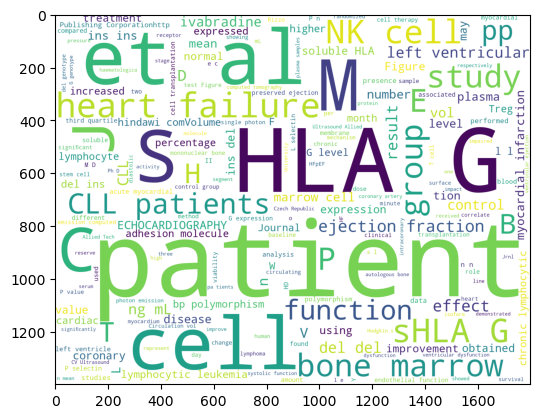

In [36]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(merged_text)

plt.imshow(wordcloud_ip)
plt.show()

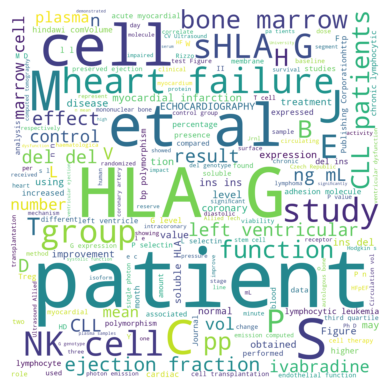

In [37]:
# remove stop words and clean text
from wordcloud import WordCloud, STOPWORDS
other_stopwords_to_remove = ['\\n', '\\t', '\\r']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1800, height = 1800, 
                background_color ='white', 
                max_words=200,
                stopwords = stopwords, 
                min_font_size = 10).generate(merged_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
# using med 7 library on merged data to get features
import spacy

med7 = spacy.load("en_core_med7_lg")

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

final_doc = med7(merged_text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

[(ent.text, ent.label_) for ent in final_doc.ents]

[('Vol', 'DRUG'),
 ('BENEKLI', 'DRUG'),
 ('Weibel', 'DRUG'),
 ('interactions', 'DRUG'),
 ('Shimizu', 'DRUG'),
 ('Modderman', 'DRUG'),
 ('Tötterman', 'DRUG'),
 ('Jaroslav Stanicek', 'DRUG'),
 ('Ladislav', 'DRUG'),
 ('M.D.‡', 'FREQUENCY'),
 ('dobutamine', 'DRUG'),
 ('dobutamine', 'DRUG'),
 ('Dobutamine', 'DRUG'),
 ('5 µg/kg per min', 'STRENGTH'),
 ('20 µg/kg', 'STRENGTH'),
 ('dobutamine', 'DRUG'),
 ('dobutamine', 'DRUG'),
 ('Sseptal', 'DRUG'),
 ('Santerior', 'DRUG'),
 ('Sinferior', 'DRUG'),
 ('sestamibi', 'DRUG'),
 ('at rest', 'FREQUENCY'),
 ('sestamibi', 'DRUG'),
 ('midazolam', 'DRUG'),
 ('albumin', 'DRUG'),
 ('5,000', 'STRENGTH'),
 ('heparin', 'DRUG'),
 ('cen-', 'DRUG'),
 ('trifuged', 'DRUG'),
 ('240 g', 'STRENGTH'),
 ('1,200 g', 'STRENGTH'),
 ('Histopaque', 'DRUG'),
 ('human albumin', 'DRUG'),
 ('1,000', 'STRENGTH'),
 ('heparin', 'DRUG'),
 ('daily', 'FREQUENCY'),
 ('75 mg', 'STRENGTH'),
 ('clopidogrel', 'DRUG'),
 ('100 mg', 'STRENGTH'),
 ('aspirin', 'DRUG'),
 ('bolus', 'DOSAGE'),
 ('h

In [39]:
features = [[ent.text, ent.label_] for ent in final_doc.ents]
features

[['Vol', 'DRUG'],
 ['BENEKLI', 'DRUG'],
 ['Weibel', 'DRUG'],
 ['interactions', 'DRUG'],
 ['Shimizu', 'DRUG'],
 ['Modderman', 'DRUG'],
 ['Tötterman', 'DRUG'],
 ['Jaroslav Stanicek', 'DRUG'],
 ['Ladislav', 'DRUG'],
 ['M.D.‡', 'FREQUENCY'],
 ['dobutamine', 'DRUG'],
 ['dobutamine', 'DRUG'],
 ['Dobutamine', 'DRUG'],
 ['5 µg/kg per min', 'STRENGTH'],
 ['20 µg/kg', 'STRENGTH'],
 ['dobutamine', 'DRUG'],
 ['dobutamine', 'DRUG'],
 ['Sseptal', 'DRUG'],
 ['Santerior', 'DRUG'],
 ['Sinferior', 'DRUG'],
 ['sestamibi', 'DRUG'],
 ['at rest', 'FREQUENCY'],
 ['sestamibi', 'DRUG'],
 ['midazolam', 'DRUG'],
 ['albumin', 'DRUG'],
 ['5,000', 'STRENGTH'],
 ['heparin', 'DRUG'],
 ['cen-', 'DRUG'],
 ['trifuged', 'DRUG'],
 ['240 g', 'STRENGTH'],
 ['1,200 g', 'STRENGTH'],
 ['Histopaque', 'DRUG'],
 ['human albumin', 'DRUG'],
 ['1,000', 'STRENGTH'],
 ['heparin', 'DRUG'],
 ['daily', 'FREQUENCY'],
 ['75 mg', 'STRENGTH'],
 ['clopidogrel', 'DRUG'],
 ['100 mg', 'STRENGTH'],
 ['aspirin', 'DRUG'],
 ['bolus', 'DOSAGE'],
 ['h

In [40]:
import pandas as pd
df_final = pd.DataFrame(features)
df_final.columns = ["Name","Category"]
df_final

,Name,Category
0,Vol,DRUG
1,BENEKLI,DRUG
2,Weibel,DRUG
3,interactions,DRUG
4,Shimizu,DRUG
...,...,...
129,MacCarthy,DRUG
130,Ouzounian,DRUG
131,Metra,DRUG
132,Melenovsky,DRUG


In [41]:
df_final.head(15)

,Name,Category
0,Vol,DRUG
1,BENEKLI,DRUG
2,Weibel,DRUG
3,interactions,DRUG
4,Shimizu,DRUG
5,Modderman,DRUG
6,Tötterman,DRUG
7,Jaroslav Stanicek,DRUG
8,Ladislav,DRUG
9,M.D.‡,FREQUENCY


In [42]:
entities=[]
labels=[]
pos_start=[]
pos_end=[]
for ent in final_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    pos_start.append(ent.start_char)
    pos_end.append(ent.end_char)
df=pd.DataFrame({"entities":entities, "labels":labels, "pos_start":pos_start, "pos_end":pos_end})
df

,entities,labels,pos_start,pos_end
0,(Vol),DRUG,14,17
1,(BENEKLI),DRUG,167,174
2,(Weibel),DRUG,2018,2024
3,(interactions),DRUG,4691,4703
4,(Shimizu),DRUG,6732,6739
...,...,...,...,...
129,(MacCarthy),DRUG,121081,121090
130,(Ouzounian),DRUG,123345,123354
131,(Metra),DRUG,124512,124517
132,(Melenovsky),DRUG,124771,124781


In [1]:
!pip install mysql.connector

  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp38-cp38-win_amd64.whl size=247962 sha256=31e07fc9f566dc352093038424ab9cdabe91ce802525f7f30080b40dd56e1cbb
  Stored in directory: c:\users\zaid\appdata\local\pip\cache\wheels\57\e4\98\5feafb5c393dd2540e44b064a6f95832990d543e5b4f53ea8f
Successfully built mysql.connector


In [1]:
import mysql.connector as sql

In [16]:
mydb = sql.connect(user='Project', host='localhost',password='abcd1234',database='project',auth_plugin='mysql_native_password')
print(mydb)

In [17]:
mycursor = mydb.cursor()

In [50]:
mycursor.execute("DROP TABLE IF EXISTS DF_FINAL")

In [51]:
mycursor.execute("""
CREATE TABLE DF_FINAL (
    name VARCHAR(100) NOT NULL,
    category VARCHAR(20),
    pos_start INT,
    pos_end INT
    )
""")

In [52]:
SQL_Insert = "INSERT INTO DF_FINAL(name, category, pos_start, pos_end) \
                VALUES (%s,%s,%s,%s)"
                
SQL_Insert_values = [(ent.text, ent.label_,ent.start_char,ent.end_char) for ent in final_doc.ents]
                
mycursor.executemany(SQL_Insert, SQL_Insert_values)

mydb.commit()